In [2]:
import cv2
import numpy as np 
import mediapipe as mp 
import pandas as pd
import csv
import os
from sklearn.model_selection import train_test_split

In [3]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [4]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
#         # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(251,172,7), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(172,7,251), thickness=1, circle_radius=1)
                                 )
        
#         # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(31,16,18), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

                        
        cv2.imshow('HELLO FROM THE OTHER SIDE', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [ ]:
results.face_landmarks.landmark[0]

x: 0.5566322803497314
y: 0.59528648853302
z: -0.022443613037467003

In [ ]:
results.face_landmarks.landmark[0].x

0.5566322803497314

In [ ]:
results.right_hand_landmarks.landmark[0].y

0.7671641707420349

In [ ]:
len_coords = len(results.right_hand_landmarks.landmark)+len(results.face_landmarks.landmark)
len_coords

489

In [ ]:
landmarks = ['class']
for value in range(1, len_coords+1):
    landmarks += ['x{}'.format(value), 'y{}'.format(value), 'z{}'.format(value), 'v{}'.format(value)]

In [ ]:
len(landmarks)

1957

In [ ]:
landmarks[-1]

'v489'

In [ ]:
with open('coords.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(landmarks)

In [ ]:
# class_name = 'HI !!'
# class_name = 'MY_Celebration'
#class_name = 'happy'
class_name = 'Sad'

In [ ]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
#         # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(251,172,7), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(172,7,251), thickness=1, circle_radius=1)
                                 )
        
#         # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(31,16,18), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )


        try:
            # Extract Pose landmarks
            right = results.right_hand_landmarks.landmark
            right_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = right_row+face_row
            
            # Append class name 
            row.insert(0, class_name)
            
            # Export to CSV
            with open('coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        
                csv_writer.writerow(row)
        except:
            pass
                        
        cv2.imshow('HELLO FROM THE OTHER SIDE', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

In [ ]:
df = pd.read_csv('coords.csv')

In [ ]:
df.head()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z487,v487,x488,y488,z488,v488,x489,y489,z489,v489
0,HI !!,0.324101,0.813521,3.856363e-07,0.0,0.375291,0.792414,-0.022106,0.0,0.412012,...,-0.004775,0.0,0.622846,0.491770,0.010376,0.0,0.627920,0.486883,0.010682,0.0
1,HI !!,0.326077,0.821791,3.665901e-07,0.0,0.378501,0.796878,-0.019635,0.0,0.413659,...,-0.004924,0.0,0.626118,0.492122,0.011358,0.0,0.630590,0.487196,0.011858,0.0
2,HI !!,0.329321,0.842637,3.005879e-07,0.0,0.377764,0.809070,-0.020117,0.0,0.408858,...,-0.005938,0.0,0.633016,0.485881,0.009963,0.0,0.637287,0.481885,0.010250,0.0
3,HI !!,0.321769,0.835540,3.271327e-07,0.0,0.371870,0.801244,-0.019387,0.0,0.402377,...,-0.003085,0.0,0.634145,0.484265,0.012557,0.0,0.638635,0.480126,0.012927,0.0
4,HI !!,0.317796,0.834129,3.362415e-07,0.0,0.368690,0.799927,-0.019840,0.0,0.398784,...,-0.003517,0.0,0.634404,0.485090,0.011210,0.0,0.638851,0.480704,0.011571,0.0


In [ ]:
df.tail()

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z487,v487,x488,y488,z488,v488,x489,y489,z489,v489
789,Sad,0.323578,0.687440,5.635169e-07,0.0,0.368904,0.663377,0.008328,0.0,0.423937,...,-0.009162,0.0,0.578592,0.534689,0.007391,0.0,0.583952,0.531316,0.007450,0.0
790,Sad,0.322783,0.684031,5.796867e-07,0.0,0.368664,0.659079,0.011029,0.0,0.422302,...,-0.010660,0.0,0.578541,0.532959,0.005808,0.0,0.583861,0.529969,0.005786,0.0
791,Sad,0.326691,0.683315,5.715733e-07,0.0,0.373487,0.653007,0.009893,0.0,0.425994,...,-0.009160,0.0,0.576156,0.532102,0.007223,0.0,0.581320,0.529015,0.007258,0.0
792,Sad,0.322911,0.685033,5.745974e-07,0.0,0.367874,0.666005,0.007760,0.0,0.421027,...,-0.011500,0.0,0.572603,0.531115,0.002034,0.0,0.578476,0.525900,0.002149,0.0
793,Sad,0.319601,0.675426,5.644877e-07,0.0,0.364596,0.651217,0.008217,0.0,0.416164,...,-0.012045,0.0,0.562896,0.519172,0.001244,0.0,0.568124,0.515540,0.001061,0.0


In [ ]:
df.sample(5)

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z487,v487,x488,y488,z488,v488,x489,y489,z489,v489
672,Sad,0.331958,0.898651,-4.235952e-07,0.0,0.403825,0.872585,0.007751,0.0,0.441994,...,-0.008998,0.0,0.516969,0.522760,0.002412,0.0,0.522635,0.518064,0.001979,0.0
127,HI !!,0.249976,0.762221,3.025999e-07,0.0,0.302375,0.734686,-0.024161,0.0,0.338369,...,-0.002719,0.0,0.607107,0.483735,0.011668,0.0,0.611127,0.479155,0.011852,0.0
57,HI !!,0.228687,0.790789,3.061808e-07,0.0,0.272124,0.751463,-0.024520,0.0,0.295626,...,-0.004104,0.0,0.596526,0.477408,0.009700,0.0,0.600312,0.471780,0.009942,0.0
303,MY_Celebration,0.202570,0.820996,1.235333e-07,0.0,0.210764,0.750108,-0.004778,0.0,0.238642,...,-0.006134,0.0,0.613067,0.491868,0.006695,0.0,0.617134,0.487706,0.006735,0.0
142,HI !!,0.261098,0.760427,3.156588e-07,0.0,0.314457,0.730895,-0.022363,0.0,0.349997,...,-0.004049,0.0,0.598287,0.486397,0.007867,0.0,0.602232,0.482283,0.007804,0.0


In [ ]:
df[df['class'] == 'MY_Celebration']

,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z487,v487,x488,y488,z488,v488,x489,y489,z489,v489
204,MY_Celebration,0.292587,0.936781,-5.044038e-08,0.0,0.281026,0.877794,-0.004474,0.0,0.283802,...,-0.007129,0.0,0.605153,0.483476,0.007284,0.0,0.609713,0.478524,0.007388,0.0
205,MY_Celebration,0.292639,0.932759,2.987893e-08,0.0,0.282568,0.872217,-0.002597,0.0,0.283434,...,-0.006937,0.0,0.599814,0.480237,0.008443,0.0,0.604225,0.475374,0.008744,0.0
206,MY_Celebration,0.294609,0.932630,-1.437397e-08,0.0,0.283947,0.874158,-0.002305,0.0,0.280696,...,-0.006365,0.0,0.597523,0.480684,0.008259,0.0,0.601912,0.475752,0.008565,0.0
207,MY_Celebration,0.312529,0.932454,-7.726974e-09,0.0,0.296830,0.870054,-0.005381,0.0,0.294837,...,-0.005529,0.0,0.591924,0.479504,0.008973,0.0,0.595852,0.475184,0.009234,0.0
208,MY_Celebration,0.309207,0.925924,-1.465067e-08,0.0,0.296312,0.867257,-0.001361,0.0,0.292343,...,-0.005916,0.0,0.587799,0.482179,0.008386,0.0,0.591813,0.477568,0.008691,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,MY_Celebration,0.233028,0.738209,-2.180136e-07,0.0,0.283719,0.720193,-0.012449,0.0,0.320601,...,-0.005238,0.0,0.595366,0.484602,0.008408,0.0,0.598903,0.479784,0.008519,0.0
413,MY_Celebration,0.228713,0.725434,-1.622306e-07,0.0,0.278670,0.708196,-0.013675,0.0,0.316397,...,-0.006592,0.0,0.598066,0.483239,0.006406,0.0,0.601781,0.478186,0.006484,0.0
414,MY_Celebration,0.225141,0.727256,-2.234978e-07,0.0,0.277273,0.712076,-0.012737,0.0,0.315672,...,-0.006276,0.0,0.597845,0.481625,0.005662,0.0,0.601608,0.477161,0.005559,0.0
415,MY_Celebration,0.223955,0.733365,-2.219506e-07,0.0,0.275664,0.715793,-0.012223,0.0,0.313374,...,-0.005968,0.0,0.599011,0.482769,0.007286,0.0,0.602523,0.478612,0.007272,0.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

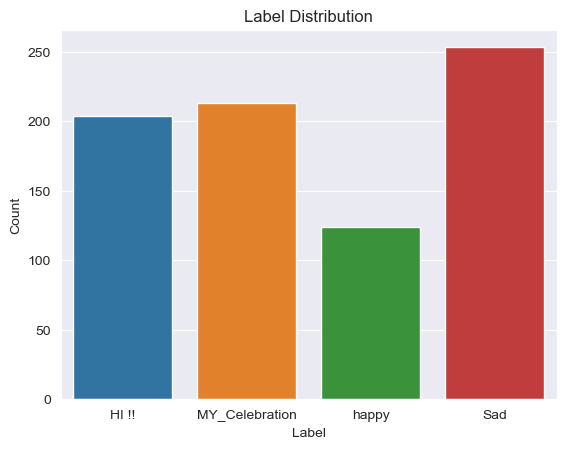

In [ ]:
sns.countplot(data=df, x='class')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

In [ ]:
X = df.drop('class', axis=1) 
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'dc':make_pipeline(StandardScaler(), DecisionTreeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [ ]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

In [ ]:
accuracy_scores = {}
for algo, model in fit_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[algo] = accuracy

accuracy_df = pd.DataFrame.from_dict(accuracy_scores, orient='index', columns=['Accuracy'])
accuracy_df.index.name = 'Algorithm'

print(accuracy_df)

           Accuracy
Algorithm          
lr         1.000000
dc         1.000000
rf         1.000000
gb         0.981132


In [ ]:
fit_models['rf'].predict(X_test)

array(['Sad', 'Sad', 'HI !!', 'happy', 'HI !!', 'Sad', 'MY_Celebration',
       'Sad', 'Sad', 'Sad', 'HI !!', 'MY_Celebration', 'Sad', 'HI !!',
       'MY_Celebration', 'MY_Celebration', 'MY_Celebration', 'Sad', 'Sad',
       'Sad', 'MY_Celebration', 'happy', 'Sad', 'Sad', 'Sad', 'HI !!',
       'MY_Celebration', 'MY_Celebration', 'Sad', 'Sad', 'MY_Celebration',
       'HI !!', 'Sad', 'Sad', 'HI !!', 'HI !!', 'Sad', 'MY_Celebration',
       'Sad', 'MY_Celebration', 'HI !!', 'MY_Celebration', 'HI !!', 'Sad',
       'Sad', 'happy', 'happy', 'happy', 'Sad', 'happy', 'MY_Celebration',
       'HI !!', 'Sad', 'Sad', 'MY_Celebration', 'MY_Celebration',
       'MY_Celebration', 'Sad', 'HI !!', 'HI !!', 'happy', 'happy', 'Sad',
       'happy', 'MY_Celebration', 'Sad', 'HI !!', 'Sad', 'MY_Celebration',
       'HI !!', 'Sad', 'HI !!', 'Sad', 'HI !!', 'HI !!', 'HI !!', 'Sad',
       'Sad', 'Sad', 'Sad', 'Sad', 'HI !!', 'HI !!', 'HI !!', 'Sad',
       'MY_Celebration', 'Sad', 'happy', 'MY_Celebrati

In [ ]:
y_test

690      Sad
775      Sad
63     HI !!
531    happy
66     HI !!
       ...  
517    happy
587      Sad
434    happy
738      Sad
511    happy
Name: class, Length: 159, dtype: object

In [ ]:
import pickle 

In [ ]:
with open('language.pkl', 'wb') as f:
    pickle.dump(fit_models['rf'], f)

## evalute

In [ ]:
with open('language.pkl', 'rb') as f:
    model = pickle.load(f)

In [ ]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False        
        
        # Make Detections
        results = holistic.process(image)
        #print(results.face_landmarks)
        
        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks
        
        # Recolor image back to BGR for rendering
        image.flags.writeable = True   
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        #image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
#         # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                                 mp_drawing.DrawingSpec(color=(251,172,7), thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(172,7,251), thickness=1, circle_radius=1)
                                 )
        
#         # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                                 mp_drawing.DrawingSpec(color=(31,16,18), thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                 )

#         # 3. Left Hand
#         mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(41,1,85), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
#                                  )

# #         # # 4. Pose Detections
#         mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, 
#                                  mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
#                                  mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
#                                  )

        try:
            # Extract Pose landmarks
            right = results.right_hand_landmarks.landmark
            right_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in right]).flatten())
            
            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())
            
            # Concate rows
            row = right_row+face_row
                
            X = pd.DataFrame([row])
            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]
            print(body_language_class, body_language_prob)
            
            # Draw bounding box and class label
            cv2.rectangle(image, (20, 30), (20 + len(body_language_class) * 20, 30 - 30), (245, 117, 16), -1)
            cv2.putText(image, body_language_class, (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display status box
            cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)
            
            # Display class
            cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0], (90, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            # Display probability
            cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        except:
            pass
                        
        cv2.imshow('HELLO FROM THE OTHER SIDE', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

happy [0.18 0.06 0.04 0.72]
happy [0.19 0.06 0.06 0.69]
happy [0.16 0.07 0.04 0.73]
happy [0.1  0.03 0.03 0.84]
happy [0.11 0.03 0.03 0.83]
happy [0.08 0.   0.02 0.9 ]
happy [0.09 0.   0.02 0.89]
happy [0.06 0.   0.02 0.92]
happy [0.07 0.   0.02 0.91]
happy [0.12 0.   0.02 0.86]
happy [0.07 0.02 0.02 0.89]
happy [0.07 0.   0.04 0.89]
happy [0.06 0.02 0.04 0.88]
happy [0.09 0.05 0.04 0.82]
happy [0.12 0.   0.02 0.86]
happy [0.08 0.   0.02 0.9 ]
happy [0.13 0.03 0.04 0.8 ]
happy [0.13 0.   0.02 0.85]
happy [0.14 0.   0.02 0.84]
happy [0.1  0.02 0.02 0.86]
happy [0.09 0.01 0.03 0.87]
happy [0.13 0.01 0.03 0.83]
happy [0.13 0.01 0.03 0.83]
happy [0.1  0.   0.03 0.87]
happy [0.14 0.   0.03 0.83]
happy [0.15 0.05 0.03 0.77]
happy [0.13 0.   0.02 0.85]
happy [0.14 0.06 0.03 0.77]
happy [0.15 0.02 0.03 0.8 ]
happy [0.11 0.01 0.03 0.85]
happy [0.16 0.03 0.03 0.78]
happy [0.1  0.   0.03 0.87]
happy [0.11 0.01 0.03 0.85]
happy [0.09 0.01 0.03 0.87]
happy [0.13 0.01 0.03 0.83]
happy [0.15 0.02 0.0